## Image classification

**Functional API**

The Functional API is a way to build neural networks in Keras by defining:

inputs

operations (layers)

outputs

Instead of stacking layers in a strict sequence, we define the model as a graph of layers.

📌 Key idea:
Each layer is like a function that takes a tensor and returns a tensor.



### Introduction to ConvNets

In [1]:
import keras
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary(line_length=80)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)          │ (None, 28, 28, 1)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                   │ (None, 26, 26, 64)       │           640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                 │ (None, 3, 3, 256)        │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d          │ (None, 256)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 10)               │         2,570 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8175 - loss: 0.5501
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9757 - loss: 0.0792
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9850 - loss: 0.0499
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9890 - loss: 0.0363
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - loss: 0.0300


In [2]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

NameError: name 'test_images' is not defined

### Training a ConvNet from scratch on a small dataset

#### Downloading the data

In [3]:
import kagglehub

kagglehub.login()



Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
download_path = kagglehub.competition_download("dogs-vs-cats")

100%|██████████| 812M/812M [00:09<00:00, 85.5MB/s]

Extracting files...


In [ ]:
import zipfile

with zipfile.ZipFile(download_path + "/train.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

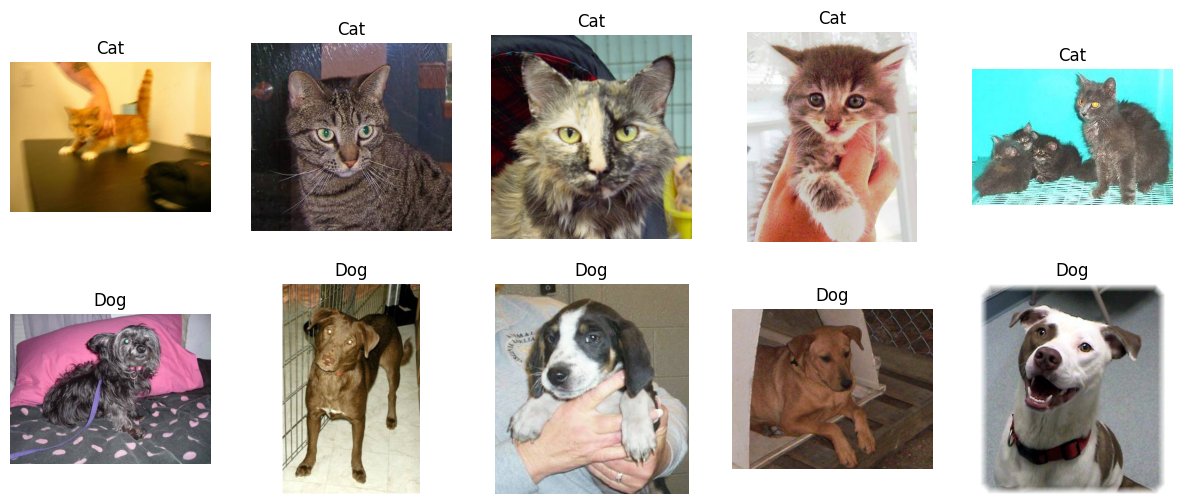

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

train_dog_dir = "dogs_vs_cats_small/train/dog"
train_cat_dir = "dogs_vs_cats_small/train/cat"

dog_images = sorted(os.listdir(train_dog_dir))[:5]
cat_images = sorted(os.listdir(train_cat_dir))[:5]

plt.figure(figsize=(15, 6))

# Cats
for i, img_name in enumerate(cat_images):
    img_path = os.path.join(train_cat_dir, img_name)
    img = mpimg.imread(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title("Cat")
    plt.axis("off")

# Dogs
for i, img_name in enumerate(dog_images):
    img_path = os.path.join(train_dog_dir, img_name)
    img = mpimg.imread(img_path)

    plt.subplot(2, 5, i+6)
    plt.imshow(img)
    plt.title("Dog")
    plt.axis("off")

plt.show()

#### Building your model

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary(line_length=80)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)        │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ rescaling (Rescaling)             │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 178, 178, 32)     │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 89, 89, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)                 │ (None, 87, 87, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 43, 43, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)                 │ (None, 41, 41, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)    │ (None, 20, 20, 128)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)                 │ (None, 18, 18, 256)      │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 9, 9, 256)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)                 │ (None, 7, 7, 512)        │     1,180,160 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d_1        │ (None, 512)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │           513 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

#### Data preprocessing

In [ ]:
from keras.utils import image_dataset_from_directory

batch_size = 64
image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=image_size, batch_size=batch_size
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=image_size, batch_size=batch_size
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=image_size, batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


##### Understanding TensorFlow Dataset objects

This converts the NumPy array into a TensorFlow Dataset.

Instead of having one big array, TensorFlow treats it like a collection of 1000 separate items.

So:

dataset has 1000 elements

each element has shape: (16,)

In [ ]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

You can use the .batch() method to batch the data.

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


map() applies a function to every element in the dataset.

So for each element x (shape (16,)):

reshape it into a matrix (4,4)

TensorFlow will process multiple elements in parallel (up to 8 at a time).

So it speeds up processing, especially for large datasets.

In [ ]:
reshaped_dataset = dataset.map(
    lambda x: tf.reshape(x, (4, 4)),
    num_parallel_calls=8)
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


##### Fitting the model

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 180, 180, 3)
labels batch shape: (64,)


The below ModelCheckpoint callback guarantees that your saved file will always contain the state of the model corresponding to its best-performing training epoch, in terms of its performance on the validation data

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.5119 - loss: 0.6958 - val_accuracy: 0.5820 - val_loss: 0.6912
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5869 - loss: 0.6869 - val_accuracy: 0.5540 - val_loss: 0.6748
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.5675 - loss: 0.6734 - val_accuracy: 0.6380 - val_loss: 0.6480
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.6446 - loss: 0.6434 - val_accuracy: 0.6630 - val_loss: 0.6181
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6467 - loss: 0.6278 - val_accuracy: 0.6730 - val_loss: 0.6141
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.6628 - loss: 0.6173 - val_accuracy: 0.6770 - val_loss: 0.6029
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6920 - loss: 0.5964 - val_accuracy: 0.6650 - val_loss: 0.6077
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.7016 - loss: 0.5767 - val_accuracy: 0

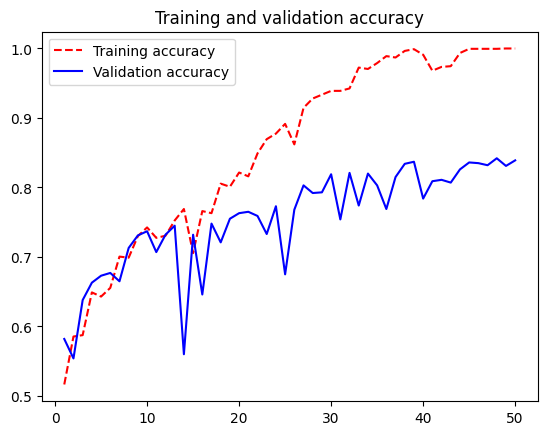

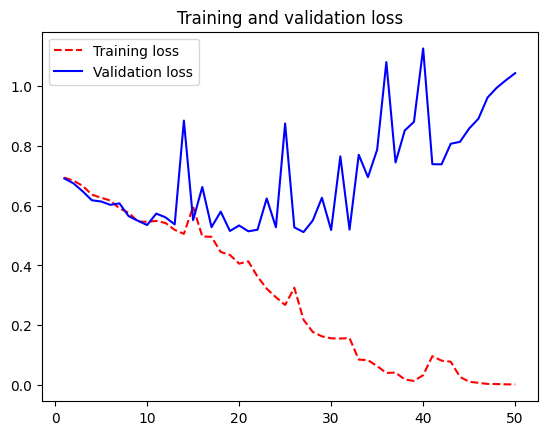

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8136 - loss: 0.5078
Test accuracy: 0.811


#### Using data augmentation

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
]

def data_augmentation(images, targets):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images, targets

augmented_train_dataset = train_dataset.map(
    data_augmentation, num_parallel_calls=8
)
augmented_train_dataset = augmented_train_dataset.prefetch(tf.data.AUTOTUNE)

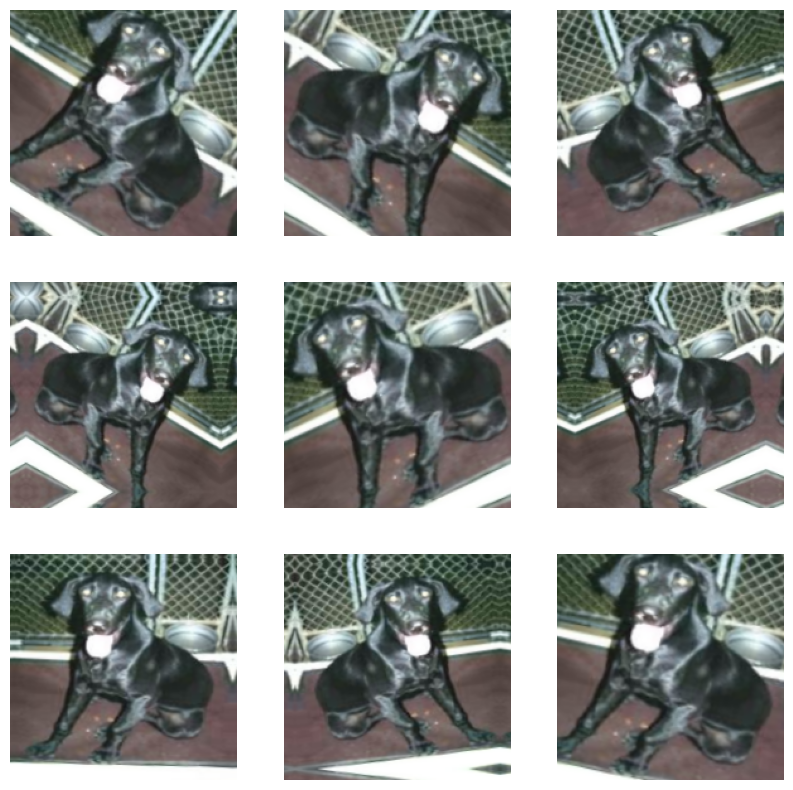

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, _ in train_dataset.take(1):
    image = image_batch[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image, _ = data_augmentation(image, None)
        augmented_image = keras.ops.convert_to_numpy(augmented_image)
        plt.imshow(augmented_image.astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.5177 - loss: 0.6924 - val_accuracy: 0.5910 - val_loss: 0.6875
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.5905 - loss: 0.6821 - val_accuracy: 0.5500 - val_loss: 0.6776
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - accuracy: 0.5941 - loss: 0.6657 - val_accuracy: 0.5890 - val_loss: 0.6737
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.6215 - loss: 0.6411 - val_accuracy: 0.6490 - val_loss: 0.6178
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 0.6165 - loss: 0.6427 - val_accuracy: 0.5200 - val_loss: 0.6779
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 398ms/step - accuracy: 0.6031 - loss: 0.6449 - val_accuracy: 0.6580 - val_loss: 0.6204
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.6302 - loss: 0.6370 - val_accuracy: 0.6700 - val_loss: 0.6155
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.6516 - loss: 0.6059 - 

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8492 - loss: 0.4281
Test accuracy: 0.848


### Using a pretrained model

#### Feature extraction with a pretrained model

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset("xception_41_imagenet")

In [ ]:
preprocessor = keras_hub.layers.ImageConverter.from_preset(
    "xception_41_imagenet",
    image_size=(180, 180),
)

##### Fast feature extraction without data augmentation

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = preprocessor(images)
        features = conv_base.predict(preprocessed_images, verbose=0)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 6, 6, 2048)

In [ ]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.GlobalAveragePooling2D()(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_features,
    train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks,
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9270 - loss: 0.1401 - val_accuracy: 0.9550 - val_loss: 0.1468
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9757 - loss: 0.0670 - val_accuracy: 0.9840 - val_loss: 0.0517
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9932 - loss: 0.0167 - val_accuracy: 0.9850 - val_loss: 0.0524
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9939 - loss: 0.0144 - val_accuracy: 0.9850 - val_loss: 0.0569
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9987 - loss: 0.0068 - val_accuracy: 0.9840 - val_loss: 0.0590
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9981 - loss: 0.0037 - val_accuracy: 0.9820 - val_loss: 0.0630
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9850 - val_loss: 0.0639
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9840 - val

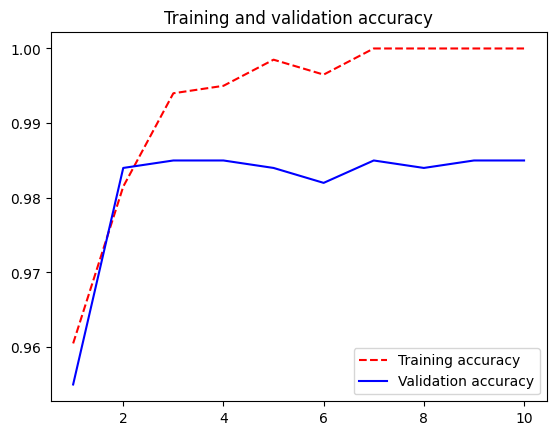

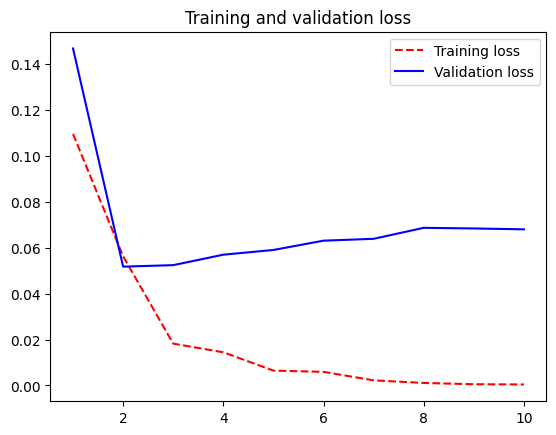

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0722
Test accuracy: 0.983


##### Feature extraction together with data augmentation

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset(
    "xception_41_imagenet",
    trainable=False,
)

In [ ]:
conv_base.trainable = True
len(conv_base.trainable_weights)

154

In [ ]:
conv_base.trainable = False
len(conv_base.trainable_weights)

0

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = preprocessor(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8592 - loss: 0.3399 - val_accuracy: 0.9850 - val_loss: 0.0489
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 484ms/step - accuracy: 0.9685 - loss: 0.0951 - val_accuracy: 0.9870 - val_loss: 0.0487
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 459ms/step - accuracy: 0.9750 - loss: 0.0704 - val_accuracy: 0.9820 - val_loss: 0.0602
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.9768 - loss: 0.0809 - val_accuracy: 0.9840 - val_loss: 0.0558
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.9719 - loss: 0.0753 - val_accuracy: 0.9670 - val_loss: 0.1277
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.9621 - loss: 0.1455 - val_accuracy: 0.9790 - val_loss: 0.0667
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.9803 - loss: 0.0693 - val_accuracy: 0.9850 - val_loss: 0.0594
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.9722 - loss: 0.0655 - val_accurac

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 270ms/step - accuracy: 0.9789 - loss: 0.0644
Test accuracy: 0.984


#### Fine-tuning a pretrained model

A good strategy is to fine-tune only the top three or four layers in the convolutional base. You’d do something like this:

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 777ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9880 - val_loss: 0.0476
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9880 - val_loss: 0.0475
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9870 - val_loss: 0.0475
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 456ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9880 - val_loss: 0.0476
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 453ms/step - accuracy: 0.9866 - loss: 0.0298 - val_accuracy: 0.9870 - val_loss: 0.0478
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.9958 - loss: 0.0208 - val_accuracy: 0.9870 - val_loss: 0.0478
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - accuracy: 0.9933 - loss: 0.0169 - val_accuracy: 0.9850 - val_loss: 0.0480
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 437ms/step - accuracy: 0.9927 - loss: 0.0186 - val_accu

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")